In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
# load dataset

breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = breast_cancer.target

# Separate data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [3]:
X_train = X_train[X_train.columns[0:10]]
X_test = X_test[X_train.columns[0:10]]

In [4]:
betas = []
penalties = [0, 0.0001, 0.001, 0.001, 0.1, 1]

for penalty in penalties:
    
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("lasso", Lasso(alpha=penalty, random_state=10))
    ])

    pipe.fit(X_train, y_train)
    
    betas.append(pd.Series(pipe.named_steps["lasso"].coef_))
    
betas = pd.concat(betas, axis=1)
betas.columns = [f"{penalty}" for penalty in penalties]
betas.index = X_train.columns

betas.head()

C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sole\Documents\Repositories\envs\fsml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.567e+01, tolerance: 9.965e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented

,0,0.0001,0.001,0.001,0.1,1
mean radius,-1.232279,-1.088828,-0.469119,-0.469119,-0.000990,-0.0
mean texture,-0.094596,-0.094412,-0.092453,-0.092453,-0.011326,-0.0
mean perimeter,0.771796,0.614117,0.000000,0.000000,-0.070558,-0.0
mean area,0.387772,0.392493,0.352491,0.352491,-0.000000,-0.0
mean smoothness,-0.041888,-0.042384,-0.042681,-0.042681,-0.000000,-0.0


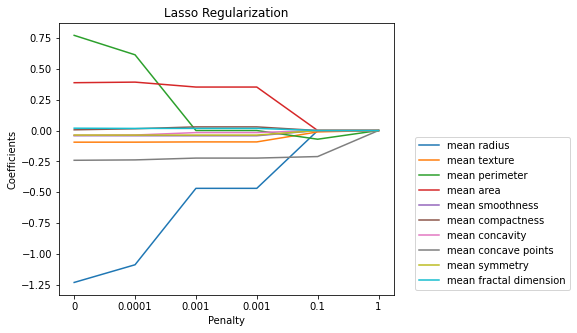

In [5]:
betas.T.plot(figsize=(6,5), legend=False)
plt.ylabel("Coefficients")
plt.xlabel("Penalty")
plt.title("Lasso Regularization")
# add legends and set its box position
plt.legend(X_train.columns,
           bbox_to_anchor = (1.05, 0.6))

In [6]:
betas = []
penalties = [0, 0.0001, 0.001, 0.001, 0.1, 1]

for penalty in penalties:
    
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("ridge", Ridge(alpha=penalty, random_state=10))
    ])

    pipe.fit(X_train, y_train)
    
    betas.append(pd.Series(pipe.named_steps["ridge"].coef_))
    
betas = pd.concat(betas, axis=1)
betas.columns = [f"{penalty}" for penalty in penalties]
betas.index = X_train.columns

betas.head()

,0,0.0001,0.001,0.001,0.1,1
mean radius,-2.199974,-2.198189,-2.182277,-2.182277,-1.280514,-0.454216
mean texture,-0.095394,-0.095393,-0.095384,-0.095384,-0.094818,-0.093457
mean perimeter,1.832789,1.830808,1.813144,1.813144,0.817122,-0.025722
mean area,0.347160,0.347253,0.348085,0.348085,0.390737,0.366657
mean smoothness,-0.037589,-0.037597,-0.037673,-0.037673,-0.041981,-0.046306


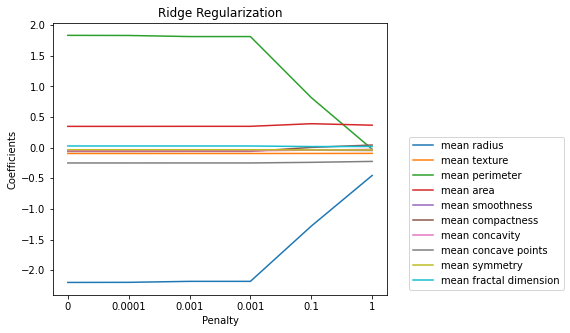

In [7]:
betas.T.plot(figsize=(6,5), legend=False)
plt.ylabel("Coefficients")
plt.xlabel("Penalty")
plt.title("Ridge Regularization")
plt.legend(X_train.columns,
           bbox_to_anchor = (1.05, 0.6))